<div align="center"> 
    <h3><font color='blue'>CSE 574 Sections C&D: Introduction to Machine Learning, Spring 2022 </font></h3>
    <h1> Assignment 4 </h1>
    <h2> Part 1 : Define an RL Environment </h2>
    <h4> Submitted By : Akanksha Das and Grishma Dharmendra Dihora</h4>

<p>"I (We) certify that the code and data in this assignment were generated independently,using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."</p>
</div>

In [1]:
!pip install gym

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

In [3]:
up=0
down=1
left=2
right=3
actions=[up,down,left,right]

In [4]:
grid = np.zeros((5, 5))
print(grid)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [5]:
pos1 = [4, 0]
pos2 = [0, 4]

grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5

print(grid)

[[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]]


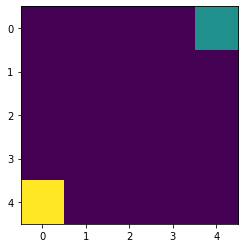

In [6]:
plt.imshow(grid)

In [7]:
class GridEnvironment(gym.Env):
  metadata = { 'render.modes': []}

  def __init__(self):
    self.observation_space = spaces.Discrete(25)    #no. of states in the grid
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 25
    

  def reset(self):
    self.timestep = 0
    self.agent_pos = [4, 0]                 #initial posiion of the agent
    self.goal_pos = [0, 4]                  #final position of the agent
    self.state = np.zeros((5, 5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()
    return observation

  def step(self, action):                   #what the agent will do at every step
    self.state = np.random.choice(self.observation_space.n)
    reward = 0
    if action == 0:
      self.agent_pos[0] += 1
    if action == 1:
      self.agent_pos[0] -= 1
    if action ==2:
      self.agent_pos[1] += 1
    if action == 3:
      self.agent_pos[1] -= 1
   
    
    self.agent_pos = np.clip(self.agent_pos, 0, 4)
    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    if (self.agent_pos[0] == 0 and self.agent_pos[1]==0):
      reward =5
      print(f"positive battery {reward}")
    elif(self.agent_pos[0]==0 and self.agent_pos[1]==3):
      reward =6
      print(f"positive battery {reward}")
    elif(self.agent_pos[0]==4 and self.agent_pos[1]==3):
      reward =-5
      print(f'negative rock {reward}')
    elif(self.agent_pos[0]==3 and self.agent_pos[1]==4):
      reward =-6
      print(f"negative rock {reward}")
    

    
    if (self.agent_pos == self.goal_pos).all():
        reward = 1

    self.timestep += 1
    
    done = True if self.timestep >= self.max_timesteps else False
    # done = True if reward == 1 else False
    print(f"Timesteps are: {self.timestep}")
    print(f"State is: {self.state}")
    print(f"Reward is: {reward}")
    print(f"GridWorld Environment: {self.render()}")
    if done==True:
      print(f"Time step is {self.timestep}")
    info = {}

    return observation, reward, done, info

  def render(self):
    plt.imshow(self.state)

In [8]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 1
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


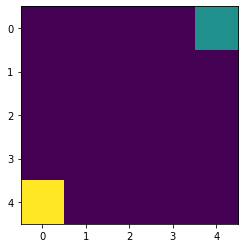

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 2
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


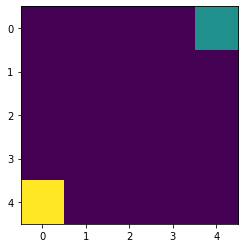

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 3
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


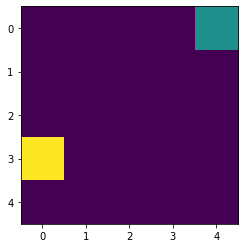

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 4
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


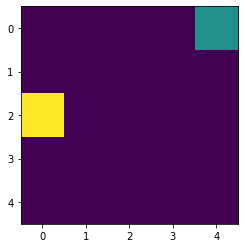

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 5
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


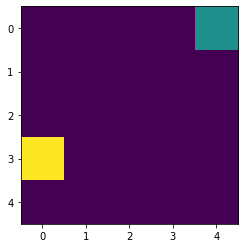

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 6
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


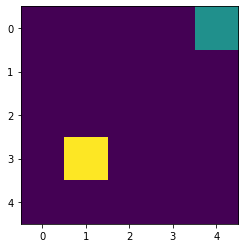

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 7
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


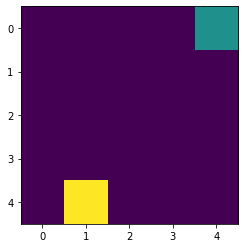

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 8
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


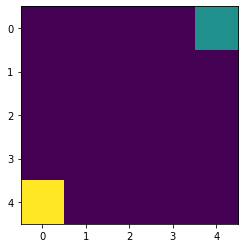

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 9
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


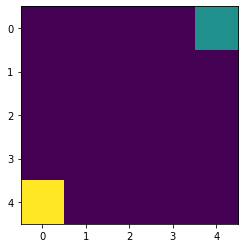

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 10
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


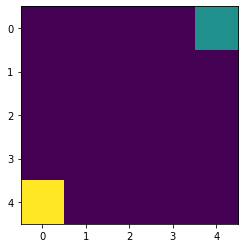

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 11
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


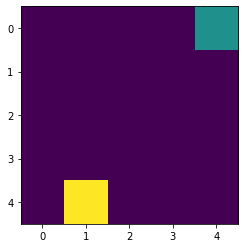

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 12
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


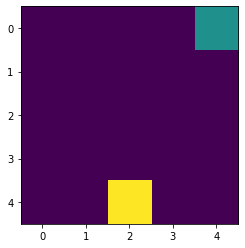

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

negative rock -5
Timesteps are: 13
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0. ]]
Reward is: -5
GridWorld Environment: None
Reward -5
Agent's action is  2


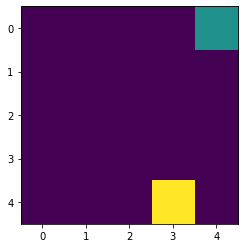

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 14
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


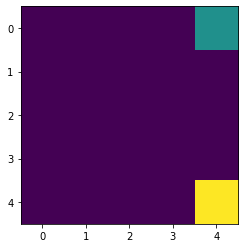

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

negative rock -6
Timesteps are: 15
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0. ]]
Reward is: -6
GridWorld Environment: None
Reward -6
Agent's action is  1


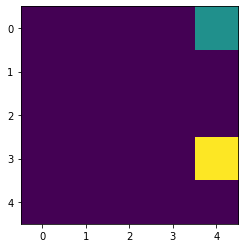

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 16
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


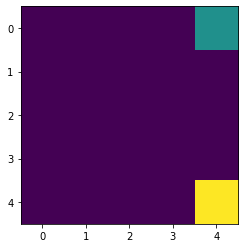

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 17
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


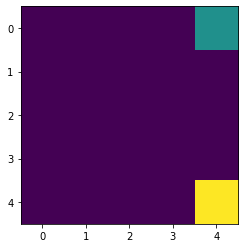

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 18
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


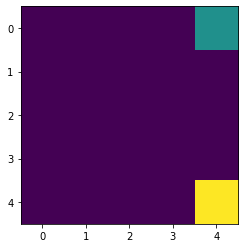

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

negative rock -5
Timesteps are: 19
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0. ]]
Reward is: -5
GridWorld Environment: None
Reward -5
Agent's action is  3


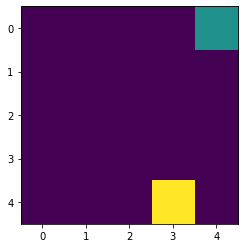

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 20
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


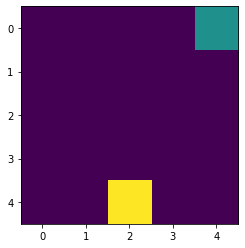

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 21
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


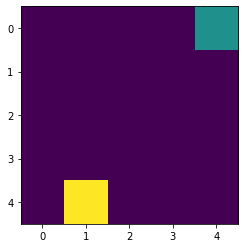

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 22
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


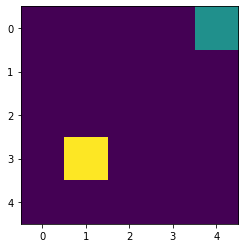

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 23
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


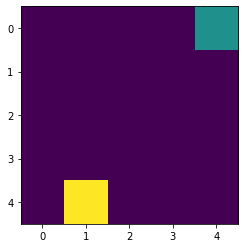

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 24
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


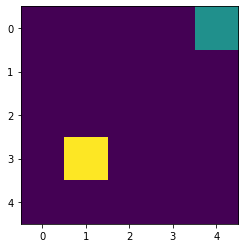

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 25
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Time step is 25
Reward 0
Agent's action is  2


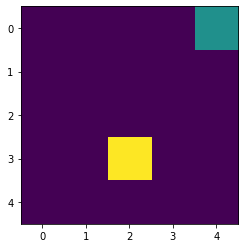

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

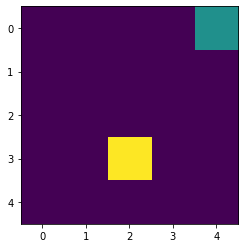

<IPython.core.display.Javascript object>

In [9]:
from google.colab import widgets
import time

env = GridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

# output_grid = widgets.Grid(1, 1)
# # for _ in range(6):
# #   grid = np.zeros((5, 5))
# #   grid[np.random.randint(5), np.random.randint(5)] = 1
# with output_grid.output_to(0, 0):
#     output_grid.clear_cell()
#     plt.imshow(grid)
#   time.sleep(1)

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()


while not done:
  action = agent.step(obs)
  obs, reward, done, info = env.step(action)
  print("Reward",reward)
  print("Agent's action is ",action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)



Timesteps are: 110
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 1
GridWorld Environment: None
Time step is 110
Reward:  1


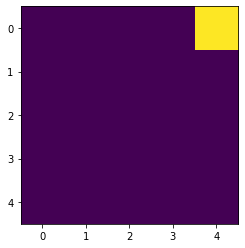

In [14]:
#Just for verification
6# for i in range(0,4):
action = 2
observation, reward, done, _ = env.step(action)
env.render()
print('Reward: ', reward)

Running the code until the agent reaches the goal position


In [11]:
class GridEnvironment(gym.Env):
  metadata = { 'render.modes': []}

  def __init__(self):
    self.observation_space = spaces.Discrete(25)    #no. of states in the grid
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 25
    

  def reset(self):
    self.timestep = 0
    self.agent_pos = [4, 0]                 #initial posiion of the agent
    self.goal_pos = [0, 4]                  #final position of the agent
    self.state = np.zeros((5, 5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()
    return observation

  def step(self, action):                   #what the agent will do at every step
    self.state = np.random.choice(self.observation_space.n)
    reward = 0
    if action == 0:
      self.agent_pos[0] += 1
    if action == 1:
      self.agent_pos[0] -= 1
    if action ==2:
      self.agent_pos[1] += 1
    if action == 3:
      self.agent_pos[1] -= 1
   
    
    self.agent_pos = np.clip(self.agent_pos, 0, 4)
    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    if (self.agent_pos[0] == 0 and self.agent_pos[1]==0):
      reward =5
      print(f"positive battery {reward}")
    elif(self.agent_pos[0]==0 and self.agent_pos[1]==3):
      reward =6
      print(f"positive battery {reward}")
    elif(self.agent_pos[0]==4 and self.agent_pos[1]==3):
      reward =-5
      print(f'negative rock {reward}')
    elif(self.agent_pos[0]==3 and self.agent_pos[1]==4):
      reward =-6
      print(f"negative rock {reward}")
    

    
    if (self.agent_pos == self.goal_pos).all():
        reward = 1

    self.timestep += 1
    
    # done = True if self.timestep >= self.max_timesteps else False
    done = True if reward == 1 else False
    print(f"Timesteps are: {self.timestep}")
    print(f"State is: {self.state}")
    print(f"Reward is: {reward}")
    print(f"GridWorld Environment: {self.render()}")
    if done==True:
      print(f"Time step is {self.timestep}")
    info = {}

    return observation, reward, done, info

  def render(self):
    plt.imshow(self.state)

In [12]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 1
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


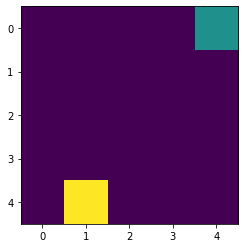

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 2
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


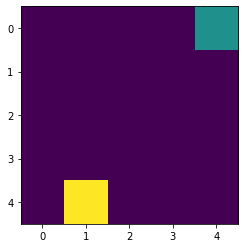

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 3
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


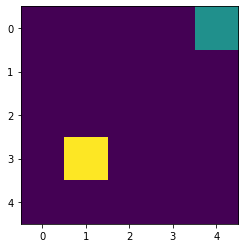

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 4
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


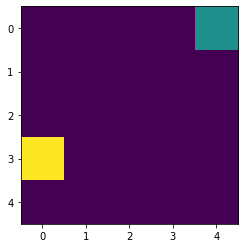

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 5
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


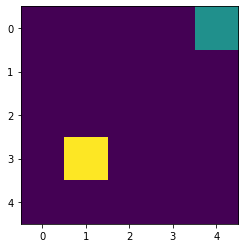

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 6
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


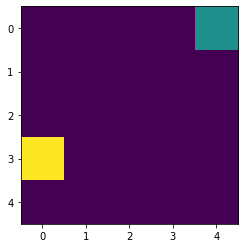

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 7
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


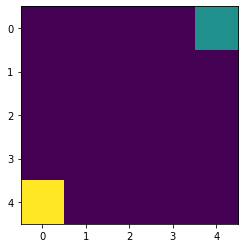

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 8
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


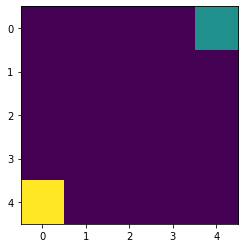

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 9
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


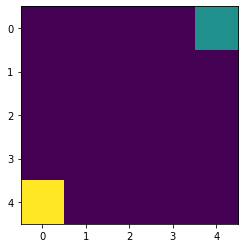

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 10
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


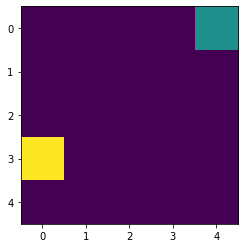

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 11
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


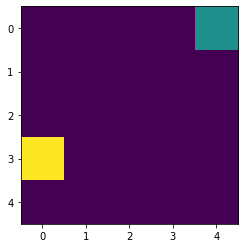

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 12
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


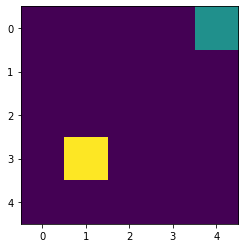

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 13
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


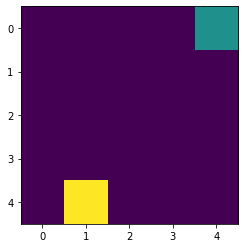

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 14
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


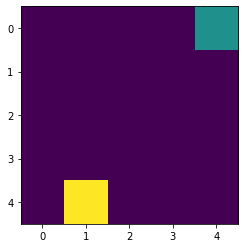

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 15
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


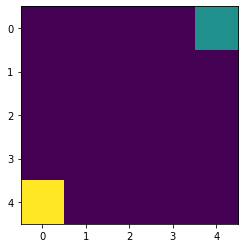

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 16
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


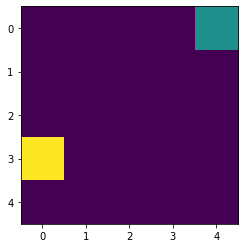

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 17
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


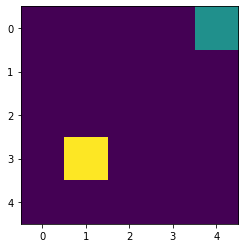

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 18
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


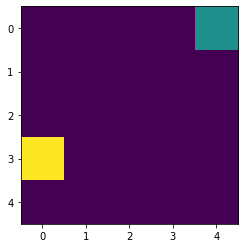

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 19
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


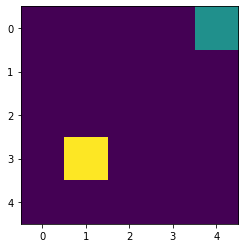

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 20
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


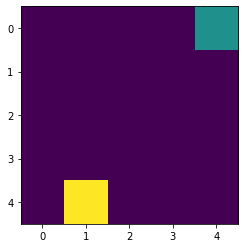

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 21
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


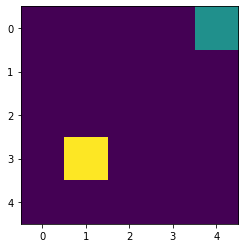

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 22
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


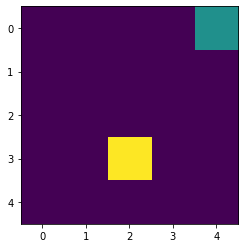

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 23
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


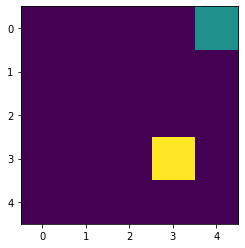

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

negative rock -5
Timesteps are: 24
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0. ]]
Reward is: -5
GridWorld Environment: None
Reward -5
Agent's action is  0


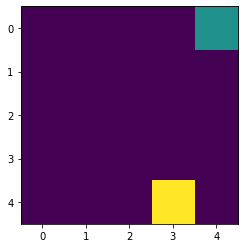

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 25
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


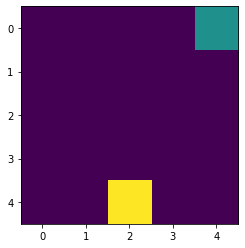

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

negative rock -5
Timesteps are: 26
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0. ]]
Reward is: -5
GridWorld Environment: None
Reward -5
Agent's action is  2


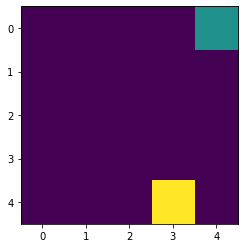

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

negative rock -5
Timesteps are: 27
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0. ]]
Reward is: -5
GridWorld Environment: None
Reward -5
Agent's action is  0


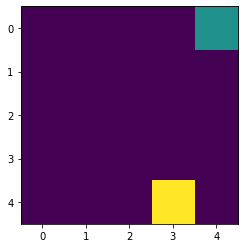

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 28
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


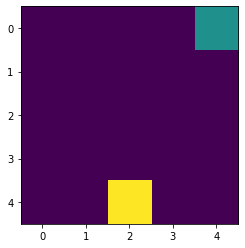

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 29
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


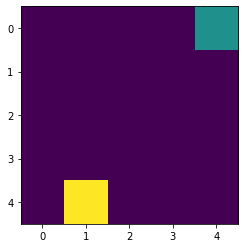

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 30
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


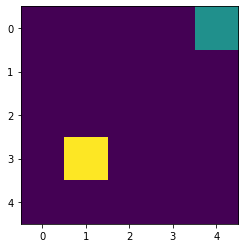

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 31
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


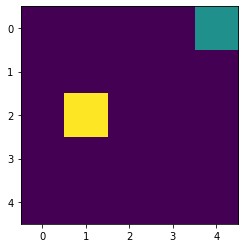

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 32
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


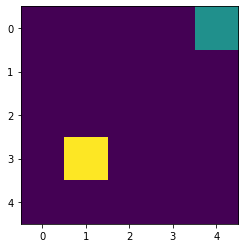

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 33
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


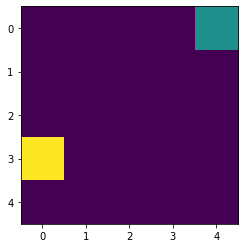

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 34
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


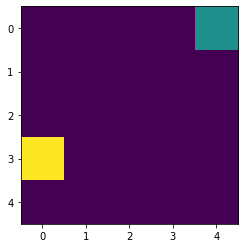

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 35
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


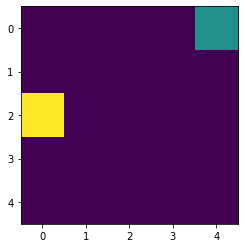

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 36
State is: [[0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


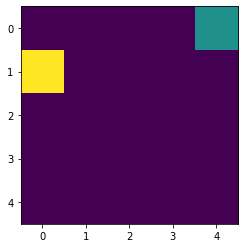

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 37
State is: [[0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


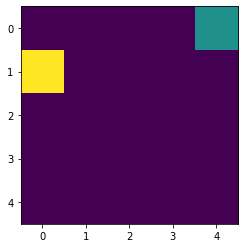

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 38
State is: [[0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


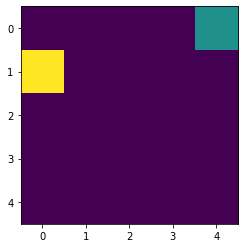

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 39
State is: [[0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


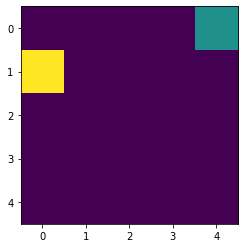

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

positive battery 5
Timesteps are: 40
State is: [[1.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 5
GridWorld Environment: None
Reward 5
Agent's action is  1


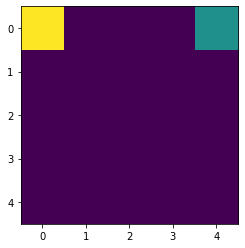

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 41
State is: [[0.  1.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


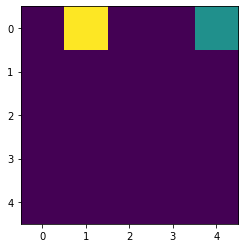

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 42
State is: [[0.  1.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


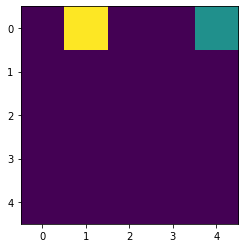

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

positive battery 5
Timesteps are: 43
State is: [[1.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 5
GridWorld Environment: None
Reward 5
Agent's action is  3


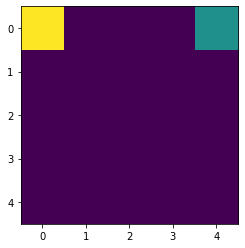

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

positive battery 5
Timesteps are: 44
State is: [[1.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 5
GridWorld Environment: None
Reward 5
Agent's action is  3


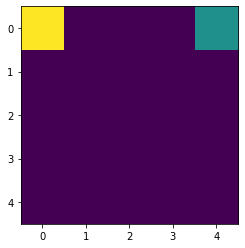

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

positive battery 5
Timesteps are: 45
State is: [[1.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 5
GridWorld Environment: None
Reward 5
Agent's action is  3


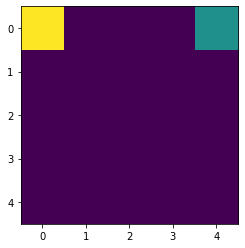

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

positive battery 5
Timesteps are: 46
State is: [[1.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 5
GridWorld Environment: None
Reward 5
Agent's action is  3


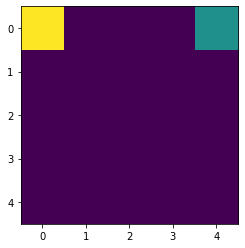

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

positive battery 5
Timesteps are: 47
State is: [[1.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 5
GridWorld Environment: None
Reward 5
Agent's action is  1


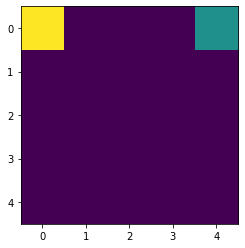

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 48
State is: [[0.  1.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


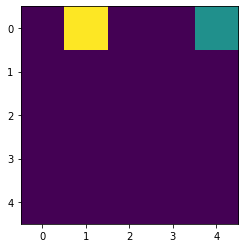

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

positive battery 5
Timesteps are: 49
State is: [[1.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 5
GridWorld Environment: None
Reward 5
Agent's action is  3


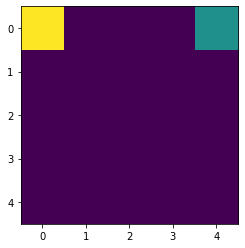

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 50
State is: [[0.  1.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


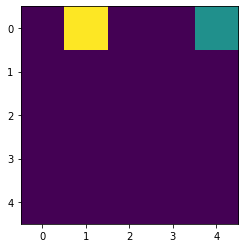

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 51
State is: [[0.  0.  0.  0.  0.5]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


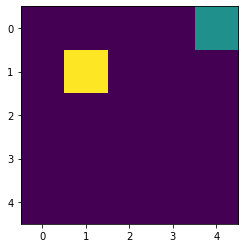

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 52
State is: [[0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


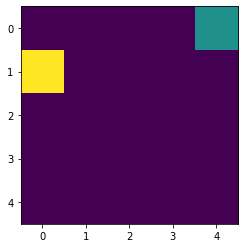

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

positive battery 5
Timesteps are: 53
State is: [[1.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 5
GridWorld Environment: None
Reward 5
Agent's action is  1


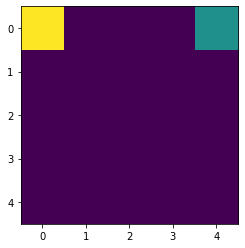

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 54
State is: [[0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


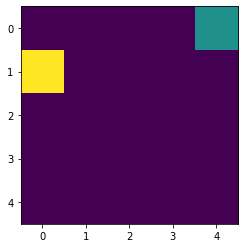

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 55
State is: [[0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


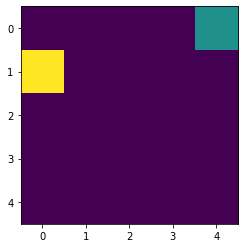

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 56
State is: [[0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


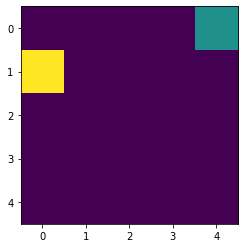

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 57
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


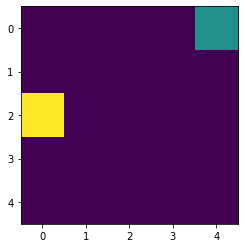

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 58
State is: [[0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


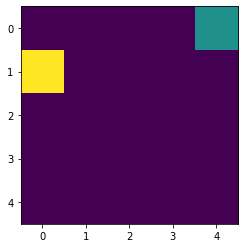

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

positive battery 5
Timesteps are: 59
State is: [[1.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 5
GridWorld Environment: None
Reward 5
Agent's action is  1


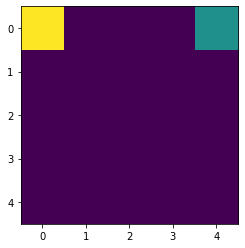

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 60
State is: [[0.  1.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


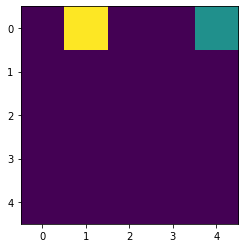

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 61
State is: [[0.  1.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


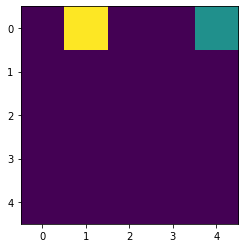

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 62
State is: [[0.  0.  0.  0.  0.5]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


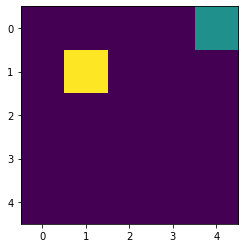

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 63
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


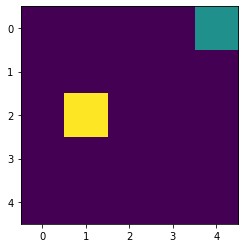

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 64
State is: [[0.  0.  0.  0.  0.5]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


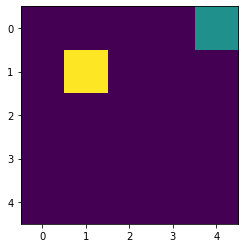

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 65
State is: [[0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


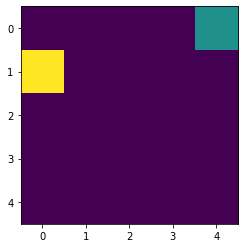

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 66
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


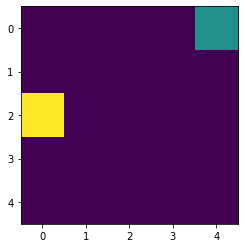

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 67
State is: [[0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


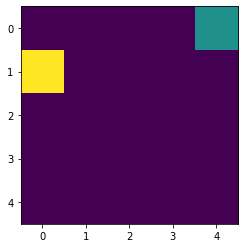

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 68
State is: [[0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


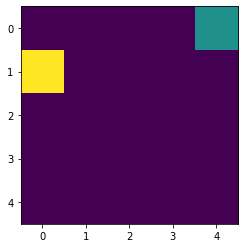

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 69
State is: [[0.  0.  0.  0.  0.5]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


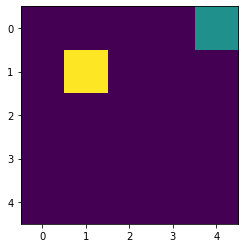

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 70
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


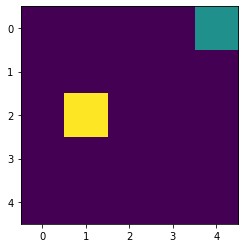

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 71
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


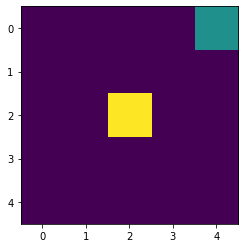

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 72
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


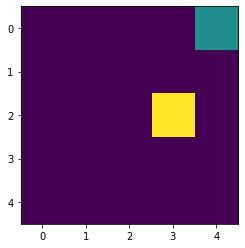

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 73
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


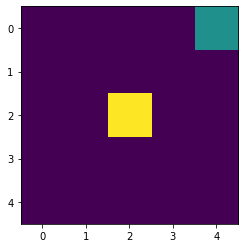

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 74
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


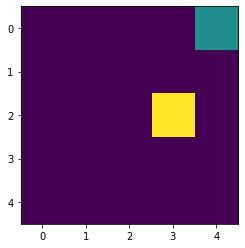

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 75
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


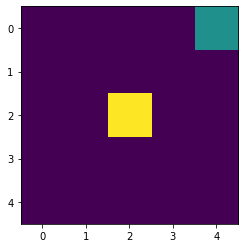

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 76
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


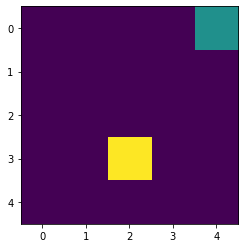

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 77
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


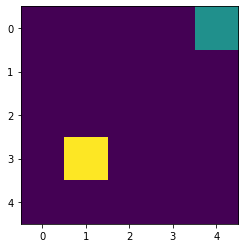

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 78
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


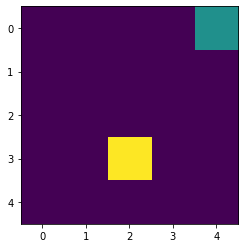

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 79
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


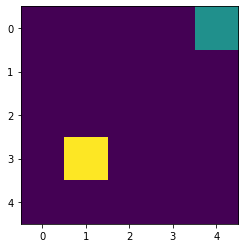

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 80
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


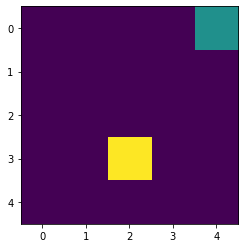

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 81
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


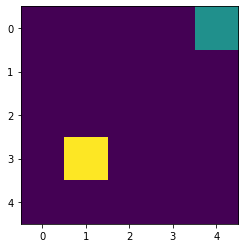

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 82
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


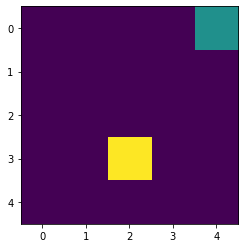

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 83
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


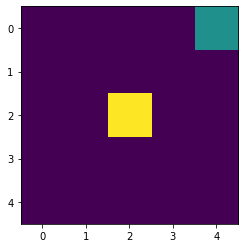

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 84
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


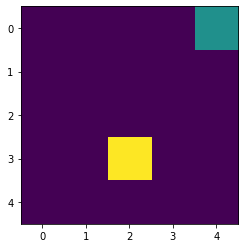

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 85
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


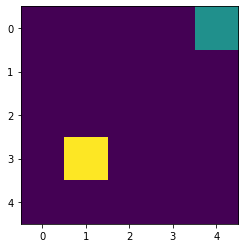

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 86
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


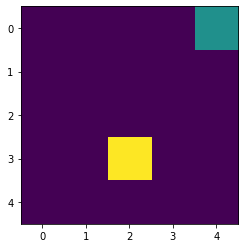

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 87
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


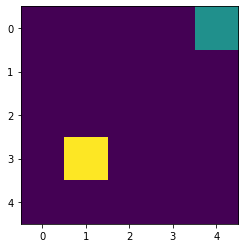

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 88
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


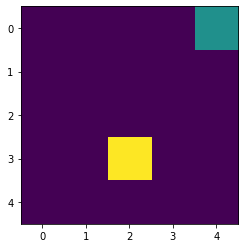

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 89
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


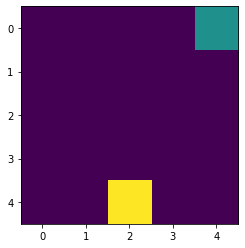

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

negative rock -5
Timesteps are: 90
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0. ]]
Reward is: -5
GridWorld Environment: None
Reward -5
Agent's action is  2


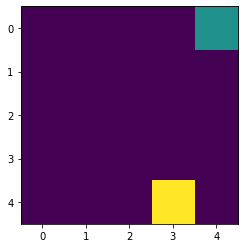

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 91
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


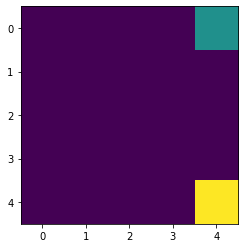

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 92
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


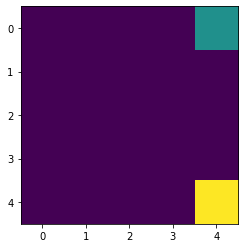

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 93
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


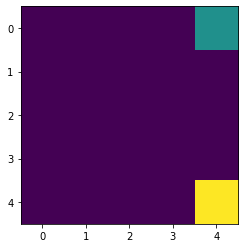

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 94
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


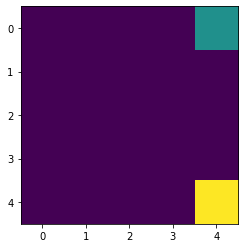

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 95
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


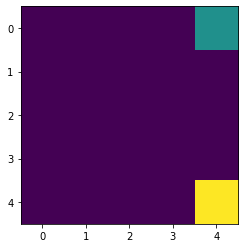

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

negative rock -6
Timesteps are: 96
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0. ]]
Reward is: -6
GridWorld Environment: None
Reward -6
Agent's action is  1


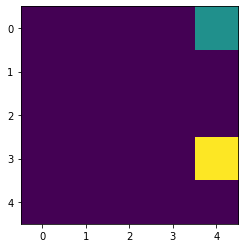

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 97
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


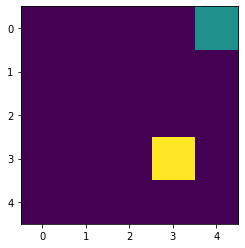

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 98
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


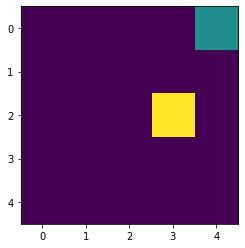

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 99
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


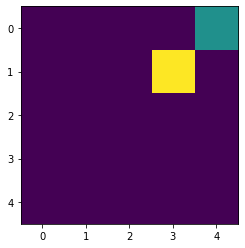

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 100
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


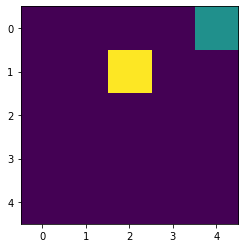

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 101
State is: [[0.  0.  0.  0.  0.5]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


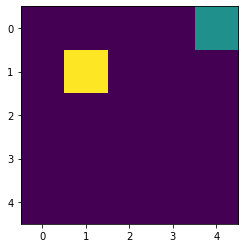

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 102
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


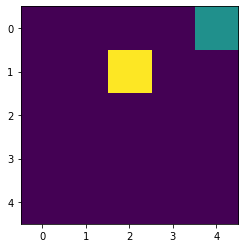

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 103
State is: [[0.  0.  1.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  1


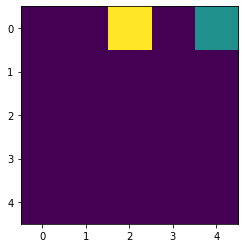

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 104
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  0


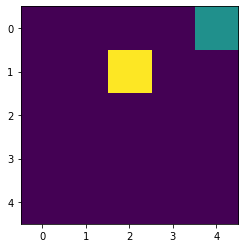

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 105
State is: [[0.  0.  0.  0.  0.5]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  3


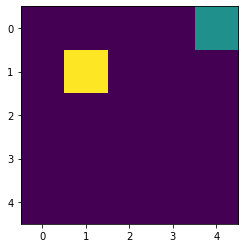

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 106
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


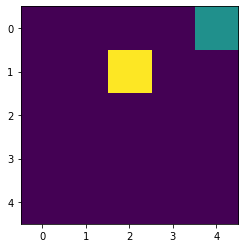

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 107
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


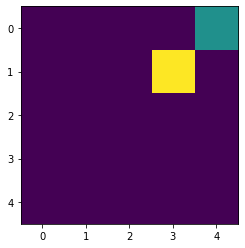

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 108
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 0
GridWorld Environment: None
Reward 0
Agent's action is  2


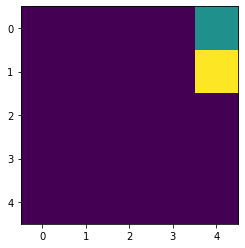

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Timesteps are: 109
State is: [[0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Reward is: 1
GridWorld Environment: None
Time step is 109
Reward 1
Agent's action is  1


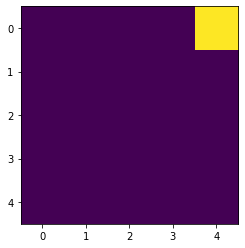

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

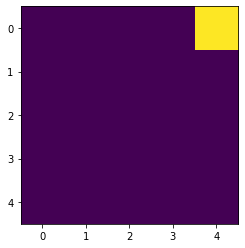

<IPython.core.display.Javascript object>

In [13]:
from google.colab import widgets
import time

env = GridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

# output_grid = widgets.Grid(1, 1)
# # for _ in range(6):
# #   grid = np.zeros((5, 5))
# #   grid[np.random.randint(5), np.random.randint(5)] = 1
# with output_grid.output_to(0, 0):
#     output_grid.clear_cell()
#     plt.imshow(grid)
#   time.sleep(1)

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()


while not done:
  action = agent.step(obs)
  obs, reward, done, info = env.step(action)
  print("Reward",reward)
  print("Agent's action is ",action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)